In [1]:
# https://huggingface.co/models?filter=bert model town
# https://huggingface.co/models?dataset=dataset:tweet_eval&other=bert&sort=downloads
# https://huggingface.co/DaNLP/da-bert-tone-sentiment-polarity for twitter

In [1]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from src.db_handler import retrieve_all_data
from src.preprocessing import text_pipe
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import datetime
rcParams['figure.figsize'] = (17, 10)
sns.set_theme(context='talk', style='whitegrid')

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/georgemarchenko/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
df = pd.DataFrame(retrieve_all_data('raw_tweets'), columns=['tweet_created', 'conversation_id', 'tweet_id', 'author_id', 'text', 'retweet_count', 'reply_count', 'like_count', 'quote_count', 'account_created', 'account_id', 'name', 'verified', 'follower_count', 'following_count', 'tweet_count', 'listed_count'])

Rows have been retrieved


In [4]:
df = text_pipe.fit_transform(df)

In [5]:
df['account_created'] = pd.to_datetime(df['account_created'])
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

In [6]:
df

,tweet_created,conversation_id,tweet_id,author_id,text,retweet_count,reply_count,like_count,quote_count,account_created,account_id,name,verified,follower_count,following_count,tweet_count,listed_count,uniqueness_%
0,2022-06-10 22:15:29+00:00,1535385188557103105,1535385188557103105,361289499,"Texas governor candidate Don Huffines: "" Bitco...",492,267,3309,32,2011-08-24 15:14:54+00:00,361289499,Bitcoin Magazine,true,2521379,765,23530,13825,100
2,2022-06-10 19:48:24+00:00,1535348174168236032,1535348174168236032,361289499,- Grayscale and Bitwise are confident a spot B...,572,258,3743,32,2011-08-24 15:14:54+00:00,361289499,Bitcoin Magazine,true,2521379,765,23530,13825,100
3,2022-06-10 19:08:11+00:00,1535338052746366977,1535338052746366977,361289499,Thanks to for publishing my article covering t...,34,0,0,0,2011-08-24 15:14:54+00:00,361289499,Bitcoin Magazine,true,2521379,765,23530,13825,100
4,2022-06-10 19:03:21+00:00,1535336834070372353,1535336834070372353,361289499,Very honored that my list of Bitcoin privacy p...,68,0,0,0,2011-08-24 15:14:54+00:00,361289499,Bitcoin Magazine,true,2521379,765,23530,13825,94
5,2022-06-10 18:40:31+00:00,1535331088154902529,1535331088154902529,361289499,"""And then we told them the inflation would not...",443,135,2895,28,2011-08-24 15:14:54+00:00,361289499,Bitcoin Magazine,true,2521379,765,23530,13825,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69800,2022-06-18 23:52:26+00:00,1538308687361474560,1538308690553413632,1371574239115972610,"I think ""OG"" will make a comeback. Back in 200...",2,3,110,0,2021-03-15 21:29:25+00:00,1371574239115972610,batsoupyum,false,23735,741,6420,333,92
69801,2022-06-18 23:52:26+00:00,1538308687361474560,1538308689567723520,1371574239115972610,"1) OG/Historic. Examples: Punks, Pepes, OG mat...",1,3,102,0,2021-03-15 21:29:25+00:00,1371574239115972610,batsoupyum,false,23735,741,6420,333,94
69802,2022-06-18 23:52:26+00:00,1538308687361474560,1538308688431042565,1371574239115972610,There have been 4 main drivers of NFTs values ...,2,5,136,1,2021-03-15 21:29:25+00:00,1371574239115972610,batsoupyum,false,23735,741,6420,333,92
69803,2022-06-19 08:34:10+00:00,1538357751524605952,1538439987938598914,2569975838,BT x Mike Shinoda :man_gesturing_OK: :man_gest...,0,0,0,0,2014-06-16 01:25:42+00:00,2569975838,Дмитрий Земцов,false,123,29,3451,3,71


In [7]:
vd = SentimentIntensityAnalyzer()

In [8]:
df['sentiment'] = df['text'].apply(lambda row: vd.polarity_scores(row))

In [9]:
df['sentiment_compound'] = df['sentiment'].apply(lambda row: dict(row)['compound'])

In [10]:
df

,tweet_created,conversation_id,tweet_id,author_id,text,retweet_count,reply_count,like_count,quote_count,account_created,account_id,name,verified,follower_count,following_count,tweet_count,listed_count,uniqueness_%,sentiment,sentiment_compound
0,2022-06-10 22:15:29+00:00,1535385188557103105,1535385188557103105,361289499,"Texas governor candidate Don Huffines: "" Bitco...",492,267,3309,32,2011-08-24 15:14:54+00:00,361289499,Bitcoin Magazine,true,2521379,765,23530,13825,100,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,2022-06-10 19:48:24+00:00,1535348174168236032,1535348174168236032,361289499,- Grayscale and Bitwise are confident a spot B...,572,258,3743,32,2011-08-24 15:14:54+00:00,361289499,Bitcoin Magazine,true,2521379,765,23530,13825,100,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",0.7184
3,2022-06-10 19:08:11+00:00,1535338052746366977,1535338052746366977,361289499,Thanks to for publishing my article covering t...,34,0,0,0,2011-08-24 15:14:54+00:00,361289499,Bitcoin Magazine,true,2521379,765,23530,13825,100,"{'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'comp...",0.4404
4,2022-06-10 19:03:21+00:00,1535336834070372353,1535336834070372353,361289499,Very honored that my list of Bitcoin privacy p...,68,0,0,0,2011-08-24 15:14:54+00:00,361289499,Bitcoin Magazine,true,2521379,765,23530,13825,94,"{'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'comp...",0.6581
5,2022-06-10 18:40:31+00:00,1535331088154902529,1535331088154902529,361289499,"""And then we told them the inflation would not...",443,135,2895,28,2011-08-24 15:14:54+00:00,361289499,Bitcoin Magazine,true,2521379,765,23530,13825,100,"{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'comp...",0.4310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69800,2022-06-18 23:52:26+00:00,1538308687361474560,1538308690553413632,1371574239115972610,"I think ""OG"" will make a comeback. Back in 200...",2,3,110,0,2021-03-15 21:29:25+00:00,1371574239115972610,batsoupyum,false,23735,741,6420,333,92,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
69801,2022-06-18 23:52:26+00:00,1538308687361474560,1538308689567723520,1371574239115972610,"1) OG/Historic. Examples: Punks, Pepes, OG mat...",1,3,102,0,2021-03-15 21:29:25+00:00,1371574239115972610,batsoupyum,false,23735,741,6420,333,94,"{'neg': 0.233, 'neu': 0.69, 'pos': 0.076, 'com...",-0.6808
69802,2022-06-18 23:52:26+00:00,1538308687361474560,1538308688431042565,1371574239115972610,There have been 4 main drivers of NFTs values ...,2,5,136,1,2021-03-15 21:29:25+00:00,1371574239115972610,batsoupyum,false,23735,741,6420,333,92,"{'neg': 0.169, 'neu': 0.787, 'pos': 0.044, 'co...",-0.7391
69803,2022-06-19 08:34:10+00:00,1538357751524605952,1538439987938598914,2569975838,BT x Mike Shinoda :man_gesturing_OK: :man_gest...,0,0,0,0,2014-06-16 01:25:42+00:00,2569975838,Дмитрий Земцов,false,123,29,3451,3,71,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [11]:
df1 = df.loc[df.tweet_created.dt.date > datetime.date(2022, month=6, day=5)]

In [12]:
df1 = df1.groupby([df1['tweet_created'].dt.strftime('%y-%m-%d-%H')])['sentiment_compound'].agg(['mean', 'count'])

In [13]:
df1 = df1.reset_index()

<AxesSubplot:xlabel='tweet_created', ylabel='count'>

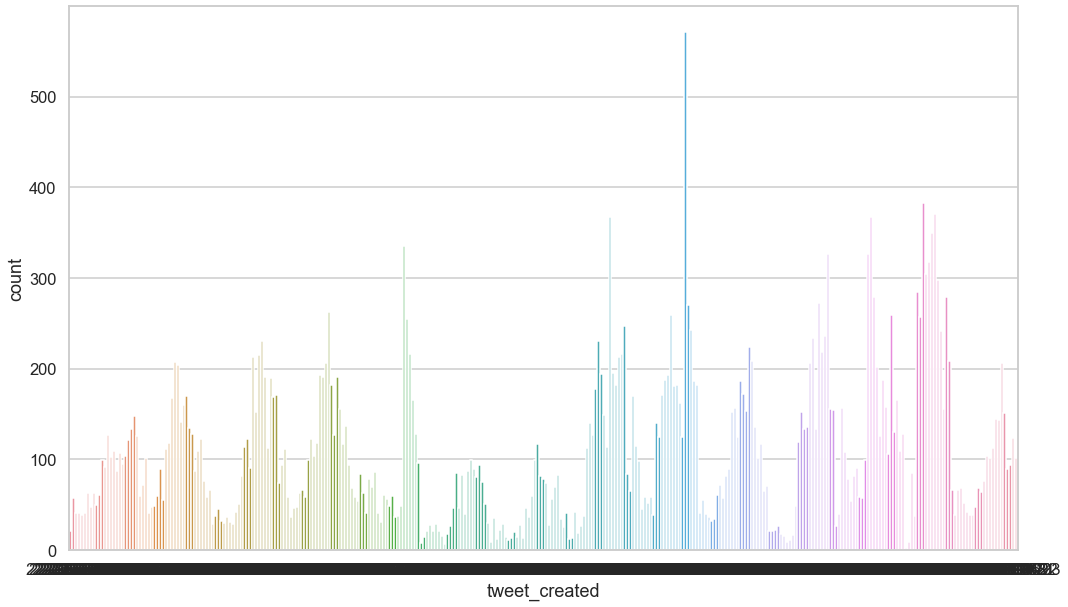

In [14]:
sns.barplot(x='tweet_created', y='count', data=df1)

In [15]:
# df1.to_csv('./hourly_sentiment.csv', index=False)

In [52]:
btc = pd.read_csv('../data/BTC-USD.csv')

In [53]:
btc['Date'] = pd.to_datetime(btc["Date"])

In [54]:
tml = btc.loc[(btc['Date'].dt.date > datetime.date(2022, 4, 9)) & (btc['Date'].dt.date <  datetime.date(2022, 6, 20))][['Date', 'Open', 'Close', 'Volume', 'High', 'Low']].set_index('Date')

In [55]:
tml

,Open,Close,Volume,High,Low
Date,,,,,
2022-04-10,42781.089844,42207.671875,17654475582,43376.378906,42021.207031
2022-04-11,42201.039063,39521.902344,33949912166,42424.589844,39373.058594
2022-04-12,39533.714844,40127.183594,30991500854,40617.585938,39388.328125
2022-04-13,40123.570313,41166.730469,27691105228,41430.054688,39712.746094
2022-04-14,41160.218750,39935.515625,24342001973,41451.480469,39695.746094
...,...,...,...,...,...
2022-06-15,22196.730469,22572.839844,54912007015,22642.671875,20178.376953
2022-06-16,22576.304688,20381.650391,31183975654,22868.921875,20265.226563
2022-06-17,20385.718750,20471.482422,27132421514,21243.312500,20326.519531


In [56]:
grouped = df.groupby([df['tweet_created'].dt.strftime('%y-%m-%d')])['sentiment_compound'].agg(['mean', 'count'])
grouped.columns = ['sentiment', 'count']
grouped.index = pd.to_datetime(grouped.index, format='%y-%m-%d')

In [57]:
tml = pd.concat([tml, grouped], axis=1)

In [58]:
tml

,Open,Close,Volume,High,Low,sentiment,count
2022-04-10,42781.089844,42207.671875,17654475582,43376.378906,42021.207031,0.168543,28
2022-04-11,42201.039063,39521.902344,33949912166,42424.589844,39373.058594,0.153087,85
2022-04-12,39533.714844,40127.183594,30991500854,40617.585938,39388.328125,0.117400,95
2022-04-13,40123.570313,41166.730469,27691105228,41430.054688,39712.746094,0.166613,89
2022-04-14,41160.218750,39935.515625,24342001973,41451.480469,39695.746094,0.218252,75
...,...,...,...,...,...,...,...
2022-06-15,22196.730469,22572.839844,54912007015,22642.671875,20178.376953,0.124367,2577
2022-06-16,22576.304688,20381.650391,31183975654,22868.921875,20265.226563,0.089788,2756
2022-06-17,20385.718750,20471.482422,27132421514,21243.312500,20326.519531,0.107759,3395
2022-06-18,20473.425781,19017.642578,42009436760,20736.041016,17708.623047,0.060319,3377


In [59]:
scaler = MinMaxScaler()

In [60]:
tml[['Open_adj', 'Close_adj', 'Volume_adj', 'High_adj', 'Low_adj', 'sentiment_adj']] = scaler.fit_transform(tml[['Open', 'Close', 'Volume', 'High', 'Low', 'sentiment']])

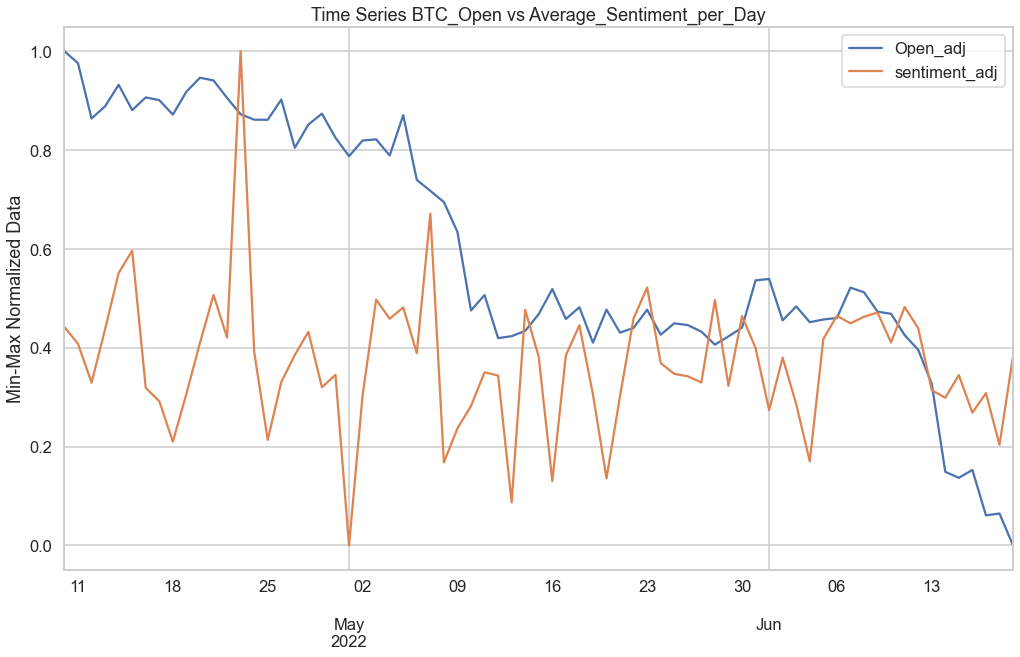

In [61]:
tml[['Open_adj', 'sentiment_adj']].plot()
plt.title('Time Series BTC_Open vs Average_Sentiment_per_Day')
plt.ylabel("Min-Max Normalized Data");

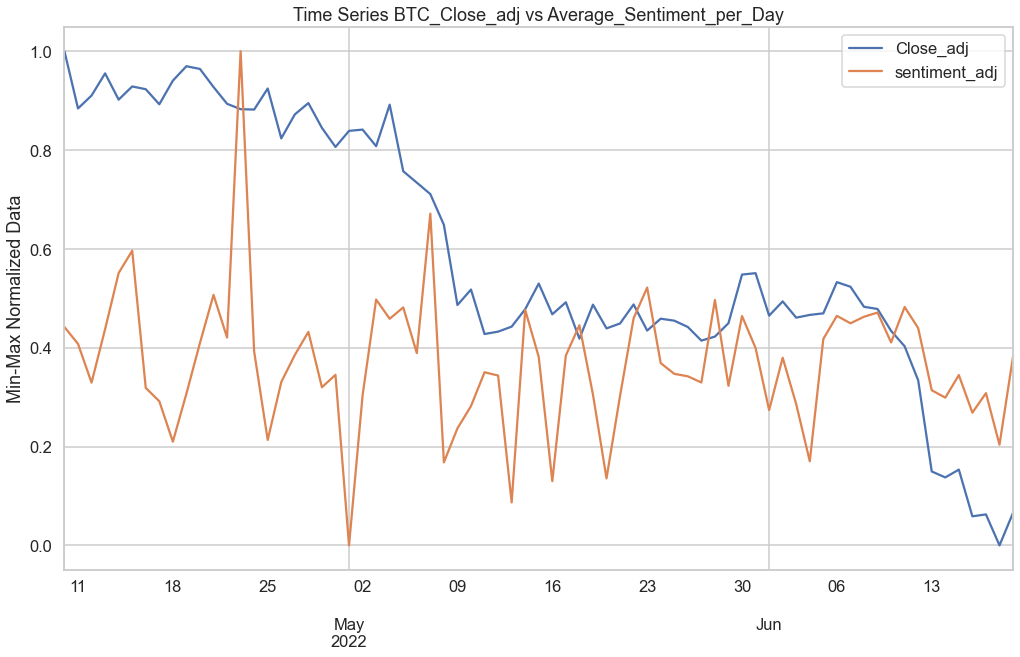

In [62]:
tml[['Close_adj', 'sentiment_adj']].plot()
plt.title('Time Series BTC_Close_adj vs Average_Sentiment_per_Day')
plt.ylabel("Min-Max Normalized Data");

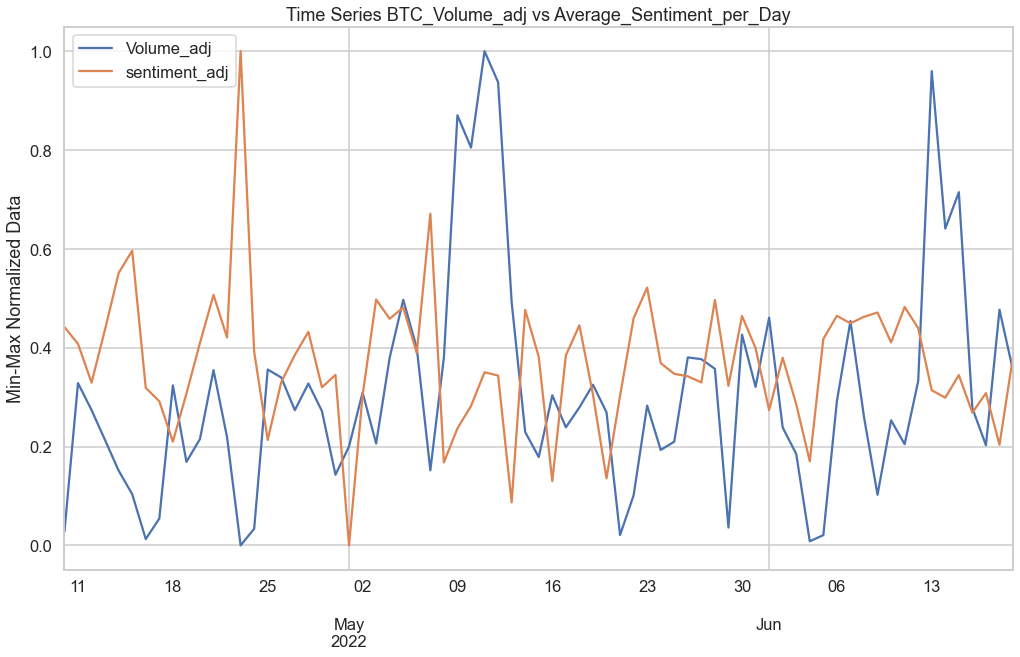

In [63]:
tml[['Volume_adj', 'sentiment_adj']].plot()
plt.title('Time Series BTC_Volume_adj vs Average_Sentiment_per_Day')
plt.ylabel("Min-Max Normalized Data");

<AxesSubplot:xlabel='sentiment_adj', ylabel='Open_adj'>

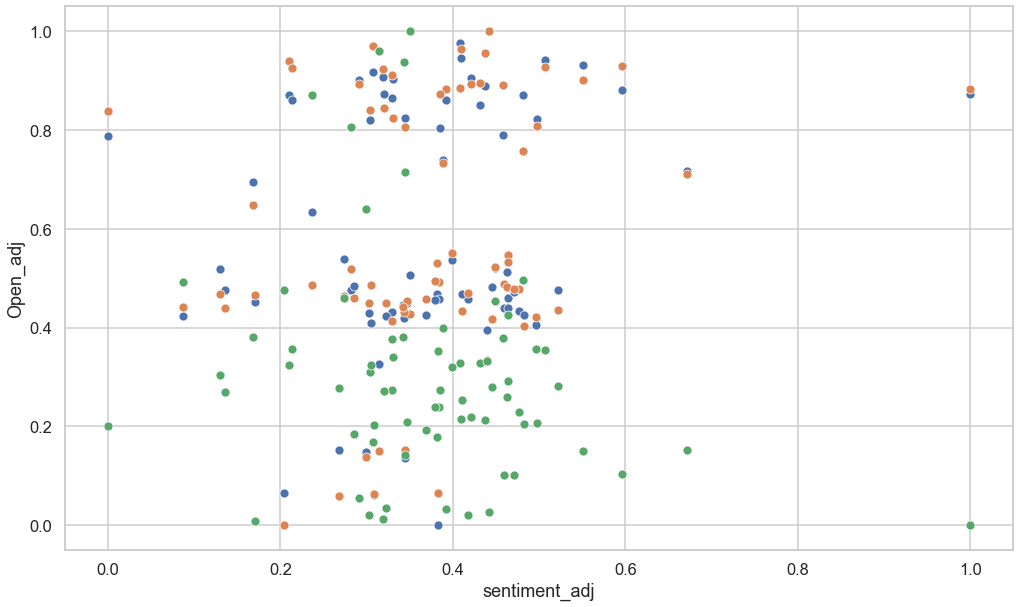

In [64]:
sns.scatterplot(data=tml, y='Open_adj', x='sentiment_adj')
sns.scatterplot(data=tml, y='Close_adj', x='sentiment_adj')
sns.scatterplot(data=tml, y='Volume_adj', x='sentiment_adj')
# plt.ylim(-1, 2)
# plt.xlim(-1, 2)

In [65]:
twe = tml.loc[tml.index.date < datetime.date(2022, 6, 6)]
twe_com = tml.loc[tml.index.date >= datetime.date(2022, 6, 6)]

In [66]:
tml['Date'] = tml.index

In [67]:
tml.to_csv('./tml.csv', index=False)

Text(0.5, 1.0, 'Average Sentiment Per Day ')

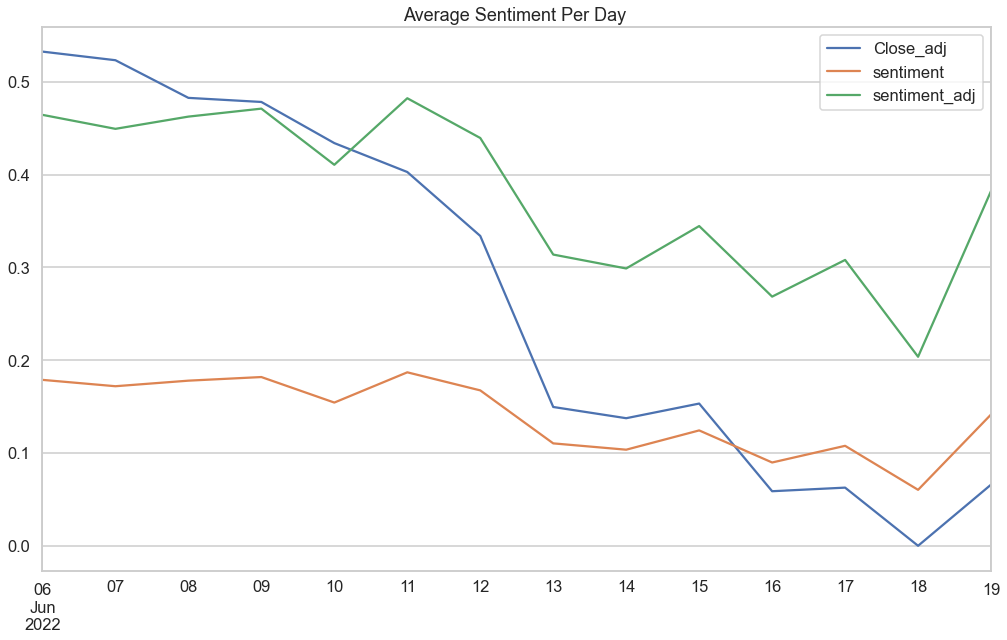

In [68]:
fig, ax = plt.subplots()
twe_com[['Close_adj', 'sentiment', 'sentiment_adj']].plot(ax=ax)
plt.title('Average Sentiment Per Day ')

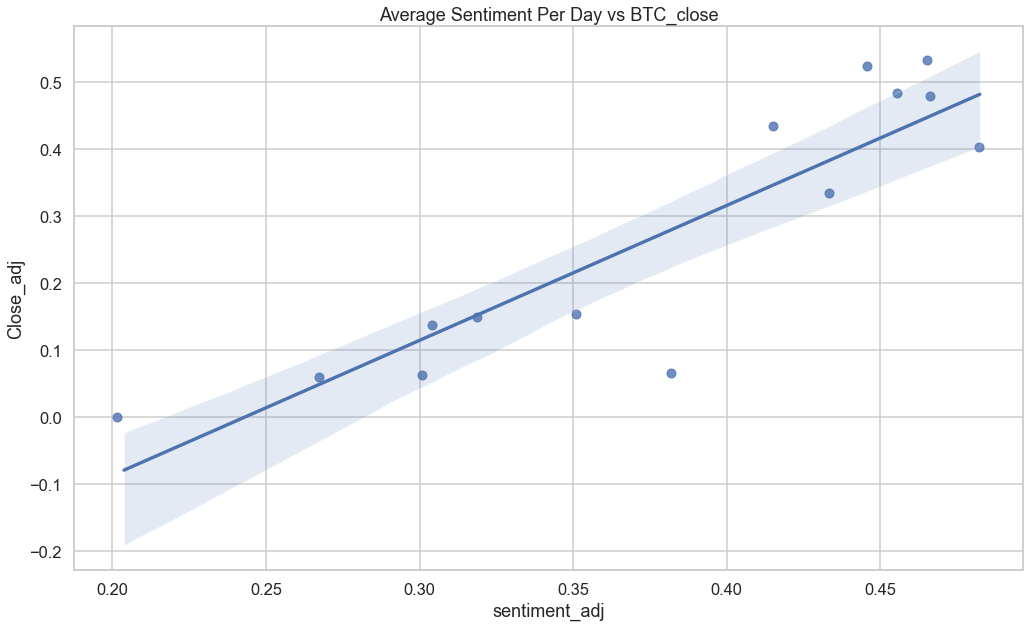

In [69]:
sns.regplot(data=twe_com, y='Close_adj', x='sentiment_adj', x_jitter=0.01)
plt.title('Average Sentiment Per Day vs BTC_close');

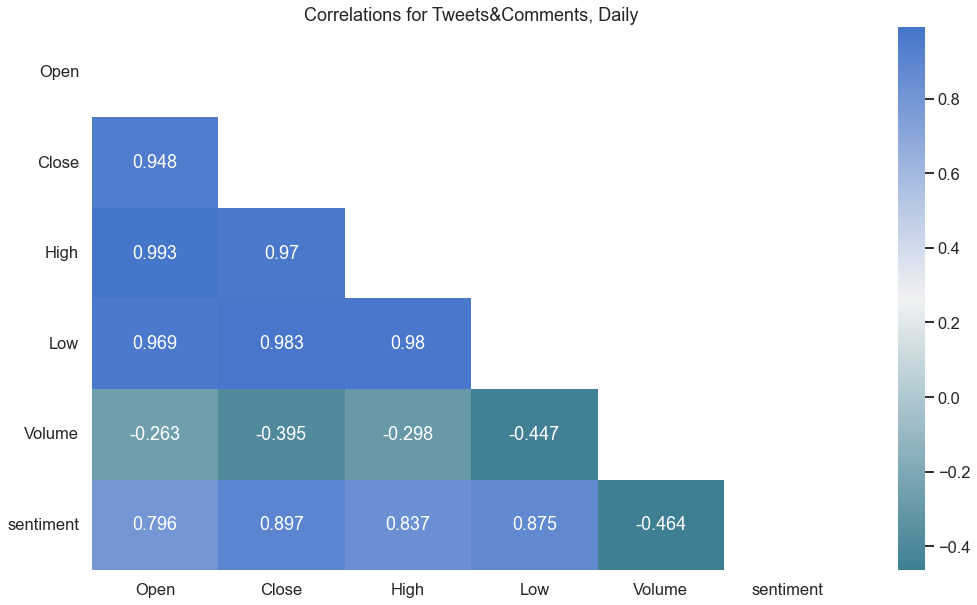

In [71]:
corr = twe_com[['Open', 'Close', 'High', 'Low', 'Volume', 'sentiment']].corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(220, 255, as_cmap=True)
sns.heatmap(data=corr, mask=mask, annot=True, cmap=cmap, fmt='.3g')
plt.title('Correlations for Tweets&Comments, Daily')
plt.xticks(rotation=-0)
plt.yticks(rotation=-0);